In [580]:
import numpy as np
import pandas as pd
from scipy.stats import zscore
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import KMeans

from sklearn.metrics import  precision_score, recall_score, f1_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
from imblearn.under_sampling import RandomUnderSampler

In [581]:
# Reading the CSV file into a DataFrame using semicolon as the delimiter
train_data = pd.read_csv(r"C:\Users\w1381\桌面\python-projects\5243\project\bank+marketing\bank-additional\bank-additional\bank-additional.csv", delimiter=';')

# Display the first few rows of the DataFrame to confirm successful loading
train_data.head(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no


In [582]:
# Import test data
test_data = pd.read_csv(r"C:\Users\w1381\桌面\python-projects\5243\project\bank+marketing\bank-additional\bank-additional\bank-additional-full.csv", delimiter=';')

# Display the first few rows of the DataFrame to confirm successful loading
test_data.head(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [583]:
train_data.shape

(4119, 21)

In [584]:
test_data.shape

(41188, 21)

In [585]:
# check missing value
train_data.isnull().any()


age               False
job               False
marital           False
education         False
default           False
housing           False
loan              False
contact           False
month             False
day_of_week       False
duration          False
campaign          False
pdays             False
previous          False
poutcome          False
emp.var.rate      False
cons.price.idx    False
cons.conf.idx     False
euribor3m         False
nr.employed       False
y                 False
dtype: bool

In [586]:
# Check missing value in test
test_data.isnull().any()

age               False
job               False
marital           False
education         False
default           False
housing           False
loan              False
contact           False
month             False
day_of_week       False
duration          False
campaign          False
pdays             False
previous          False
poutcome          False
emp.var.rate      False
cons.price.idx    False
cons.conf.idx     False
euribor3m         False
nr.employed       False
y                 False
dtype: bool

In [587]:
# Encode the target variable
train_data_copy = train_data.copy()
train_data_copy['y'] = train_data['y'].map({'yes':1, 'no':0})

test_data_copy = test_data.copy()
test_data_copy['y'] = test_data['y'].map({'yes':1, 'no':0})

In [588]:
train_data_copy.head(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,0
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,0
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,0
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,0
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,0


In [589]:
test_data_copy.head(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0


In [590]:
# Identify categorical and numerical columns
categorical_cols = train_data_copy.select_dtypes(include=['object', 'bool']).columns
numerical_cols = train_data_copy.select_dtypes(include=['int64', 'float64']).columns
print(numerical_cols)
print(categorical_cols)

# check if all features are the same
print(categorical_cols == test_data_copy.select_dtypes(include=['object', 'bool']).columns)
print(numerical_cols == test_data_copy.select_dtypes(include=['int64', 'float64']).columns)

Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')
Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome'],
      dtype='object')
[ True  True  True  True  True  True  True  True  True  True]
[ True  True  True  True  True  True  True  True  True  True  True]


In [591]:
# Remove the outlier values
# zscore_data = train_data_copy[numerical_cols].apply(zscore)
# threhold = 3
# outliers = (zscore_data.abs() > threhold ).any(axis = 1)
# train_data_copy = train_data_copy[~outliers]
# train_data_copy.reset_index(drop=True,inplace=True)




In [592]:
# # Do such feature engineering for test data as well
# zscore_data = test_data_copy[numerical_cols].apply(zscore)
# threhold = 3
# outliers = (zscore_data.abs() > threhold ).any(axis = 1)
# test_data_copy = test_data_copy[~outliers]
# test_data_copy.reset_index(drop=True,inplace=True)

C:\Users\w1381\AppData\Local\Temp\ipykernel_39408\2012512189.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = train_data[numerical_cols].corr()


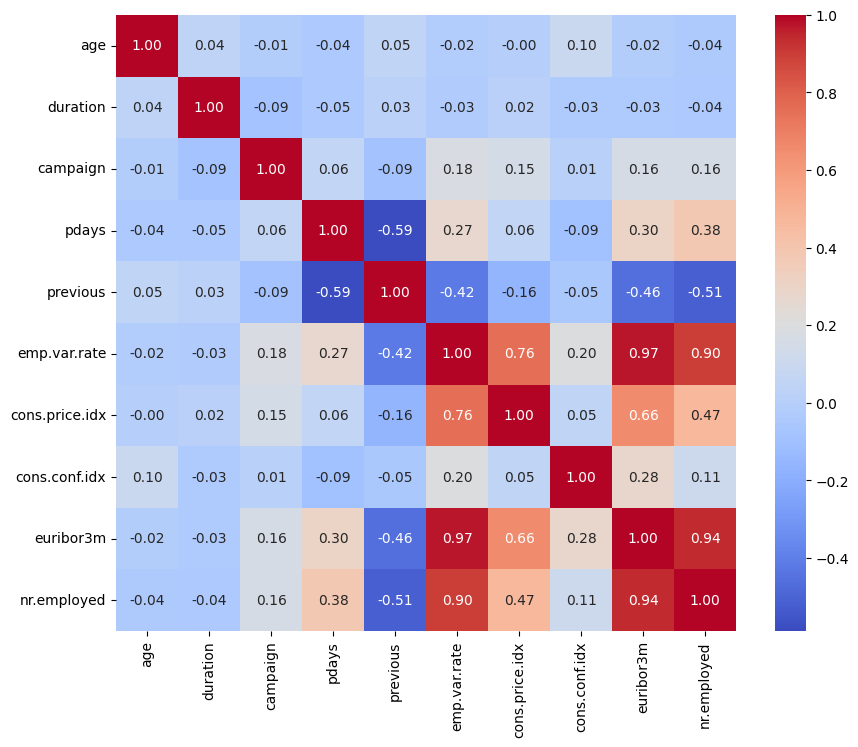

In [593]:
# check multicollinearity
# Calculating the correlation matrix
corr_matrix = train_data[numerical_cols].corr()

# Visualizing the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.show()

In [594]:
train_data.shape

(4119, 21)

In [595]:
train_data_copy.shape

(4119, 21)

In [596]:
df_with_const = add_constant(train_data_copy[numerical_cols])
vif_data = pd.DataFrame()
vif_data['feature'] = df_with_const.columns
vif_data["VIF"] = [variance_inflation_factor(df_with_const.values, i) for i in range(df_with_const.shape[1])]
vif_data

,feature,VIF
0,const,517332.526104
1,age,1.016410
2,duration,1.255747
3,campaign,1.048397
4,pdays,1.679984
5,previous,1.823153
6,emp.var.rate,31.965777
7,cons.price.idx,6.357137
8,cons.conf.idx,2.564836
9,euribor3m,62.961307


In [597]:
# List out VIF is larger than 5
high_vif_fea = vif_data[vif_data['VIF'] > 5]['feature']
high_vif_fea = high_vif_fea[high_vif_fea != 'const']
high_vif_fea

6       emp.var.rate
7     cons.price.idx
9          euribor3m
10       nr.employed
Name: feature, dtype: object

In [598]:
# Drop features we have just listed 
train_data_copy = train_data_copy.drop(columns = high_vif_fea)
test_data_copy = test_data_copy.drop(columns =high_vif_fea)


In [599]:
# Separate features and target variable
X_train = train_data_copy.drop('y', axis = 1)
y_train = train_data_copy['y']

In [600]:
X_test = test_data_copy.drop('y', axis = 1)
y_test = test_data_copy['y']

In [601]:
# Lets select numerical and categorical features
numerical_features = X_train.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X_train.select_dtypes(include=['object', 'bool']).columns

In [602]:
numerical_features

Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'cons.conf.idx'], dtype='object')

In [603]:
categorical_features

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome'],
      dtype='object')

In [604]:
# Create transformers for numeric and categorical columns
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])  # Scale data

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])  # Convert categorical data to one-hot vectors

# Combine transformers into a single preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)])



In [605]:
# Clustering as feature engineering
clustering = KMeans(n_clusters=5)

# Classification model - using Logistic Regression here
classifier = LogisticRegression()

In [606]:
# Full pipeline: preprocessing, clustering-feature, classification
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('clustering', clustering),
    ('classifier', classifier)
])


In [607]:
train_data_copy[train_data_copy['y'] == 0].shape

(3668, 17)

In [608]:
train_data_copy[train_data_copy['y'] == 1].shape

(451, 17)

In [609]:
# Resample the dataset
rus = RandomUnderSampler(random_state=42)
X_train, y_train = rus.fit_resample(X_train, y_train)


In [610]:
# Cross-validation
scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='f1')  # 5-fold cross-validation

c:\Users\w1381\桌面\python-projects\venv\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\w1381\桌面\python-projects\venv\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\w1381\桌面\python-projects\venv\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\w1381\桌面\python-projects\venv\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init

In [611]:
# Output the accuracy
print("scores for each fold:", scores)
print("Mean cross-validation score: {:.2f}".format(scores.mean()))

scores for each fold: [0.81355932 0.82485876 0.75294118 0.7625     0.75641026]
Mean cross-validation score: 0.78


In [612]:
# Fit the pipeline to the training data
pipeline.fit(X_train, y_train)


c:\Users\w1381\桌面\python-projects\venv\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'cons.conf.idx'], dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome'],
      dtype='object'))])),
                ('clustering', KMeans(n_clusters=5)),
                ('classifier', LogisticRegression())])

In [613]:
# Predict using test dataset
y_predict = pipeline.predict(X_test)


In [614]:
precision = precision_score(y_test, y_predict)
recall = recall_score(y_test, y_predict)
f_1 = f1_score(y_test, y_predict)
accuracy = pipeline.score(X_test, y_test)
print(f'accuracy: {accuracy}')
print(f'precision score: {precision}')
print(f'recall score: {recall}')
print(f'f1 score:{f_1}')


accuracy: 0.7544673205788094
precision score: 0.24293095349929544
recall score: 0.5573275862068966
f1 score:0.3383709519136408


# Above is some preprocessing and try to direcly apply clustering using kmeans into the pipeline.
Using KMeans clustering directly in the pipeline of a classification problem can sometimes lead to worse performance. Using KMeans in a classification pipeline implies using an unsupervised method where a supervised one is typically appropriate, which can confuse the model if not integrated thoughtfully.KMeans assumes that clusters are spherical and that they are separable in a way that each cluster's variance is roughly the same. When used in a classification context, if the true boundaries between classes are not spherical or have imbalanced variances, KMeans might oversimplify these boundaries, leading to poor classification performance. Remember even after we applied some technique to fix the imbalance of the y.

# Starting from here we will restart everything and head deeply into clusetring for customer segmentation.

In [615]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn import feature_selection

# Notice that if we use additional csv then we probably will not have moderately good clustering in this process. For those who are interested in just uncomment some code below to see difference when applying clustering.

In [616]:
# Reload the data
##### Uncomment #####
# train_data = pd.read_csv(r"C:\Users\w1381\桌面\python-projects\5243\project\bank+marketing\bank-additional\bank-additional\bank-additional-full.csv", delimiter=';')

train_data = pd.read_csv(r"C:\Users\w1381\桌面\python-projects\5243\project\bank+marketing\bank-additional\bank-additional\bank-full.csv", delimiter=';')

In [617]:
train_data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [618]:
# remove rows that contain outliers for numerical variables
##### Uncomment #####
# train_data = train_data.drop(columns=["emp.var.rate", "cons.price.idx","cons.conf.idx", "euribor3m","nr.employed"])
# Q1 = train_data[["age", "duration", "pdays", "previous"]].describe().T["25%"]
# Q3 = train_data[["age", "duration", "pdays", "previous"]].describe().T["75%"].T
# IQR = (Q3 - Q1) 

#### Comment this #####
Q1 = train_data[["age", "balance", "day", "duration", "pdays", "previous"]].describe().T["25%"]
Q3 = train_data[["age", "balance", "day", "duration", "pdays", "previous"]].describe().T["75%"].T
IQR = (Q3 - Q1) 

train_data.drop(train_data[train_data.age < (Q1.age - 3 * IQR.age)].index, inplace=True)
train_data.drop(train_data[train_data.age > (Q3.age + 3 * IQR.age)].index, inplace=True)


train_data.drop(train_data[train_data.duration < (Q1.duration - 3 * IQR.duration)].index, inplace=True)
train_data.drop(train_data[train_data.duration > (Q1.duration + 3 * IQR.duration)].index, inplace=True)

train_data.drop(train_data[train_data.pdays < (Q1.pdays - 3 * IQR.pdays)].index, inplace=True)
train_data.drop(train_data[train_data.pdays > (Q3.pdays + 3 * IQR.pdays)].index, inplace=True)

train_data.drop(train_data[train_data.previous < (Q1.previous - 3 * IQR.previous)].index, inplace=True)
train_data.drop(train_data[train_data.previous > (Q3.previous + 3 * IQR.previous)].index, inplace=True)

In [619]:
# For some categorical attributes such as job, education, and contact since their 
# unknown category is the minority among all other categories for these attribute; 
# replace the unknown placeholder with the mode category for that attribute.
categorical_attributes = ["job", "education", "contact"]

for attribute in categorical_attributes:
    mode_category = train_data[attribute].mode()[0]
    train_data[attribute] = train_data[attribute].replace("unknown", mode_category)

In [620]:
# One-hot encoder and normalize the data

df_data = train_data.drop(train_data[["y"]], axis=1)
df_data = pd.get_dummies(df_data)

target = train_data[["y"]]
target.replace("yes", 1, inplace=True)
target.replace("no", 0, inplace=True)

df_table = pd.concat([df_data, target], axis=1)

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_data_normal = scaler.fit_transform(df_table)

target_split = df_data_normal[:, -1]
xdata_split = df_data_normal[:, :-1]

C:\Users\w1381\AppData\Local\Temp\ipykernel_39408\1165872836.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target.replace("yes", 1, inplace=True)
C:\Users\w1381\AppData\Local\Temp\ipykernel_39408\1165872836.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target.replace("no", 0, inplace=True)


In [621]:
# Extract X and y for train and test
X_train, X_test, y_train, y_test = train_test_split(xdata_split, target_split, test_size=0.2, random_state=100)

In [622]:
X_train = pd.DataFrame(X_train)
# X_test = pd.DataFrame(X_test)
y_train = pd.DataFrame(y_train)
# y_test = pd.DataFrame(y_test)
# target = pd.DataFrame(target)

In [623]:
data_train_x_y = pd.concat([X_train, y_train], axis=1)


features with variance < 0.1
   filter out features
0                  age
1              balance
2                  day
3             duration
4             campaign
5                pdays
6             previous
7           job_admin.
8     job_entrepreneur
9        job_housemaid
10         job_retired
11   job_self-employed
12        job_services
13         job_student
14      job_unemployed
15          default_no
16         default_yes
17    contact_cellular
18   contact_telephone
19           month_apr
20           month_dec
21           month_feb
22           month_jan
23           month_mar
24           month_nov
25           month_oct
26           month_sep
27    poutcome_unknown
28                   y


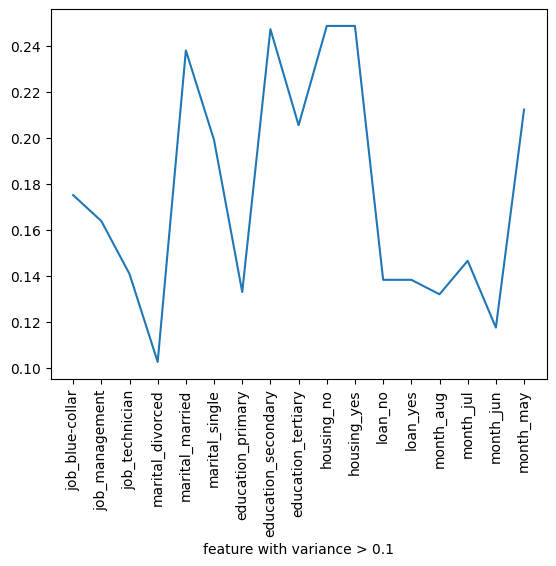

In [624]:
# Feature selection by variance with sklearn VarianceThreshold
from sklearn.feature_selection import VarianceThreshold
selector = VarianceThreshold(threshold=0.1)
train_data_A_fs=selector.fit_transform(data_train_x_y)

selected_variances=selector.variances_[selector.get_support(indices=True)]
names = df_table.columns.values[selector.get_support(indices =True)]


plt.plot(names,selected_variances)
plt.xticks(rotation='vertical')
plt.xlabel("feature with variance > 0.1")

#filter out the variance < 0.1 
filter_out=[]
for i in df_table.columns.values:
    if i not in names:
        filter_out.append(i)
filter_out_tb=pd.DataFrame(filter_out,columns=["filter out features"])

print ("\nfeatures with variance < 0.1")
print (filter_out_tb)

In [625]:
# Convert all elements to strings and check if "_" is in each element
contains_underscore = np.array([str(item).find('_') != -1 for item in names])

# Check if all elements contain "_"
all_have_underscore = contains_underscore.all()

print("Do all names have an underscore?:", all_have_underscore)

Do all names have an underscore?: True


In [626]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

cluster_range=range(2,24,2)
intra_class_similarity=[]
silhouette=[]


for i in cluster_range:
    kmeans_optimal=KMeans(n_clusters=i,max_iter=500,random_state=12)
    kmeans_optimal.fit(train_data_A_fs)
    intra_class_similarity.append(kmeans_optimal.inertia_)
    prediction=kmeans_optimal.fit_predict(train_data_A_fs)
    silhouette.append(silhouette_score(train_data_A_fs,prediction,sample_size=1000,random_state=12))

c:\Users\w1381\桌面\python-projects\venv\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\w1381\桌面\python-projects\venv\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\w1381\桌面\python-projects\venv\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\w1381\桌面\python-projects\venv\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init

c:\Users\w1381\桌面\python-projects\venv\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


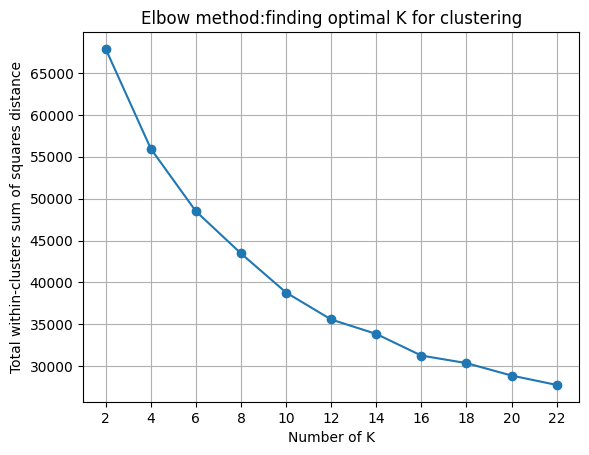

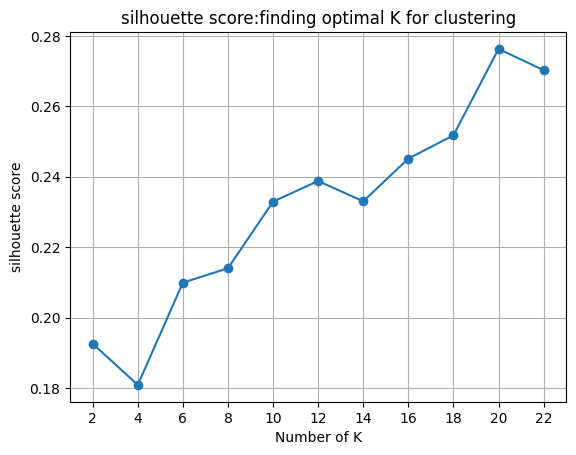

    # of K      Distance
0        2  67871.561240
1        4  55964.062171
2        6  48494.520057
3        8  43460.027116
4       10  38795.668781
5       12  35576.486732
6       14  33851.499099
7       16  31269.030874
8       18  30370.052407
9       20  28886.716084
10      22  27766.115646

     # of K  Silhouette Score
0        2          0.192582
1        4          0.180869
2        6          0.209910
3        8          0.214005
4       10          0.232906
5       12          0.238785
6       14          0.233000
7       16          0.245122
8       18          0.251743
9       20          0.276280
10      22          0.270246


In [627]:
find_k1_elb=zip(cluster_range,intra_class_similarity)
Distance=pd.DataFrame(find_k1_elb,columns=["# of K","Distance"])

find_k2_Silhou=zip(cluster_range,silhouette)
Silhouette=pd.DataFrame(find_k2_Silhou,columns=["# of K","Silhouette Score"])

plt.grid(True)
plt.plot(cluster_range,intra_class_similarity,marker = "o")
plt.title("Elbow method:finding optimal K for clustering")
plt.ylabel("Total within-clusters sum of squares distance")
plt.xlabel("Number of K")
plt.xticks(cluster_range)
plt.show()

plt.grid(True)
plt.plot(cluster_range,silhouette,marker = "o")
plt.title("silhouette score:finding optimal K for clustering")
plt.ylabel("silhouette score")
plt.xlabel("Number of K")
plt.xticks(cluster_range)
plt.show()


print (Distance)
print ("\n",Silhouette)

The Silhouette Score is a measure of how similar an object is to its own cluster (cohesion) compared to other clusters (separation). The silhouette score ranges from -1 to 1, where a high value indicates that the object is well matched to its own cluster and poorly matched to neighboring clusters.  Based on the Silhouette score, when k=20, the score reaches 0.27628, which is the highest among the plotted values. However, the score's proximity to 0 suggests that there is significant overlap between clusters in higher dimensions, indicating limited distinctiveness among the clusters.

In [628]:
#evaluate the results when k=20

kmeans_optimal=KMeans(n_clusters=20,max_iter=500,random_state=12)
kmeans_optimal.fit(train_data_A_fs)
cluster_prediction=kmeans_optimal.predict(train_data_A_fs)
silhouette_score(train_data_A_fs,cluster_prediction,sample_size=1000,random_state=12)

c:\Users\w1381\桌面\python-projects\venv\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


0.2762799173690046

[0.20893046 0.15004045]


c:\Users\w1381\桌面\python-projects\venv\Lib\site-packages\seaborn\regression.py:598: UserWarning: legend_out is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)


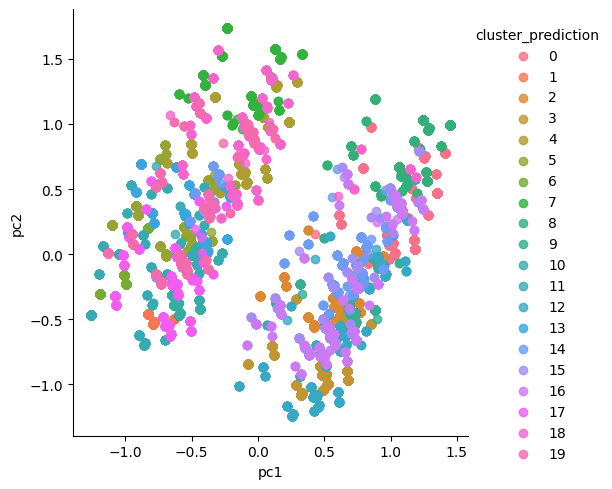

In [629]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
trans_train=pca.fit(train_data_A_fs).transform(train_data_A_fs)

print(pca.explained_variance_ratio_) 
pc1=pd.DataFrame(trans_train[:,0],columns=["pc1"])
pc2=pd.DataFrame(trans_train[:,1],columns=["pc2"])
pcs=pd.concat([pc1,pc2],axis=1)
cluster_prediction_df = pd.DataFrame(cluster_prediction,columns=["cluster_prediction"])
cluster_plot=pd.concat([pcs,cluster_prediction_df],axis=1)

sns.lmplot(data=cluster_plot, x='pc1', y='pc2', hue='cluster_prediction', fit_reg=False, legend=True, legend_out=True)
plt.show()


After PCA, we can then plot the clustering prediction in 2D. Plot shows the outcome of K-means clustering with k=21. It indeed indicates that there are overlappings of the clustering which follow the silhouette score.

In [630]:
# Create tables to map the observation with its y values and predicted cluster labels
fs_column_index = df_table.columns.values[selector.get_support(indices=True)]
fs_index_tb = pd.DataFrame(train_data_A_fs, columns=fs_column_index)

tb_fs_without_y = pd.concat([fs_index_tb, cluster_prediction_df], axis=1)
tb_fs_with_y = pd.concat([tb_fs_without_y, target], axis=1)

In [631]:
# Create dataframe for different clusters for further analysis
cluster_counts = []
for i in range(20):
    cluster = tb_fs_with_y[tb_fs_with_y['cluster_prediction'] == i]
    cluster_0_count = cluster[cluster['y'] == 0].shape[0]
    cluster_1_count = cluster[cluster['y'] == 1].shape[0]
    cluster_counts.append(pd.DataFrame({'Cluster': i, 'Count_0': cluster_0_count, 'Count_1': cluster_1_count}, index=[0]))

cluster_counts_df = pd.concat(cluster_counts, ignore_index=True)

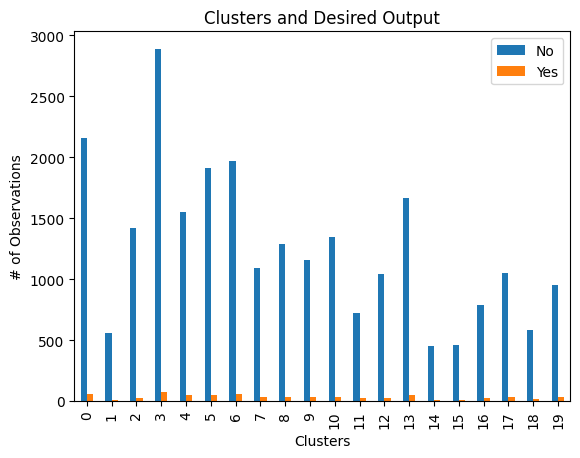

,No,Yes,Conversion Rate
0,2156,60,0.027076
1,555,8,0.014210
2,1418,25,0.017325
3,2889,71,0.023986
4,1553,47,0.029375
5,1911,49,0.025000
6,1969,56,0.027654
7,1089,31,0.027679
8,1286,31,0.023538
9,1153,34,0.028644


In [632]:
# Calculate ratio and create tb dataframe
tb = pd.concat([cluster_counts_df["Count_0"], cluster_counts_df["Count_1"]], axis=1)
tb.columns = ["No", "Yes"]

# Plotting the bar chart
tb.plot(kind="bar")
plt.title("Clusters and Desired Output")
plt.xlabel("Clusters")
plt.ylabel("# of Observations")
plt.show()

# Create ratio_tb dataframe
tb["Ratio/Conversion Rate"] = tb["Yes"] / (tb["No"] + tb["Yes"])
tb.columns = ["No", "Yes", "Conversion Rate"]
tb

In [633]:
# Extract top 3 clusters with highest rate
top3 = tb.sort_values(by='Conversion Rate', ascending=False).head(3)
top3

,No,Yes,Conversion Rate
19,951,32,0.032553
18,580,19,0.031720
13,1666,51,0.029703


,mean
marital_divorced,1.000000
loan_no,1.000000
housing_yes,1.000000
education_secondary,0.805634
month_may,0.560563
job_technician,0.223474
job_blue-collar,0.153991
month_jul,0.132394
education_tertiary,0.126761
month_jun,0.095775


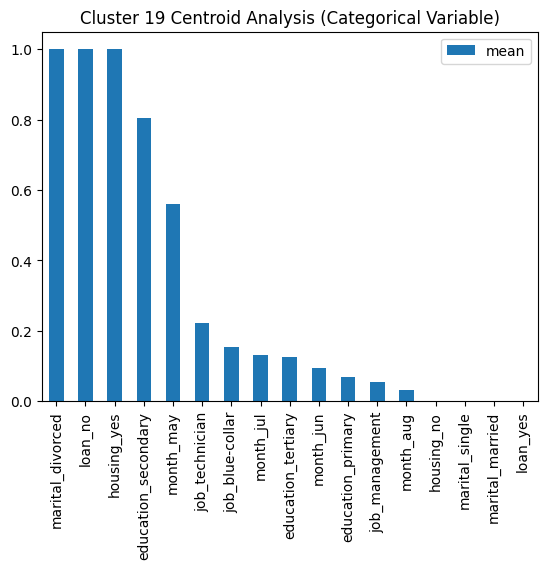

In [634]:
# Cluster 19 customer characteristics
cluster_19 = tb_fs_with_y[tb_fs_with_y['cluster_prediction'] == 19]
c19_1 = cluster_19.drop(["cluster_prediction", "y"], axis=1)
columns_without_py = c19_1.columns.values

cluster_19_transformed = pd.DataFrame(c19_1, columns=columns_without_py)
cluster_19_characteristics = pd.DataFrame(cluster_19_transformed.describe().T["mean"]).sort_values(by="mean", ascending=False)

cluster_19_characteristics.plot(kind="bar")
plt.title("Cluster 19 Centroid Analysis (Categorical Variable)")

cluster_19_characteristics

,mean
loan_yes,1.000000
education_tertiary,0.983333
housing_yes,0.959091
marital_married,0.601515
job_management,0.575758
month_may,0.313636
marital_single,0.251515
month_jul,0.219697
job_technician,0.163636
marital_divorced,0.146970


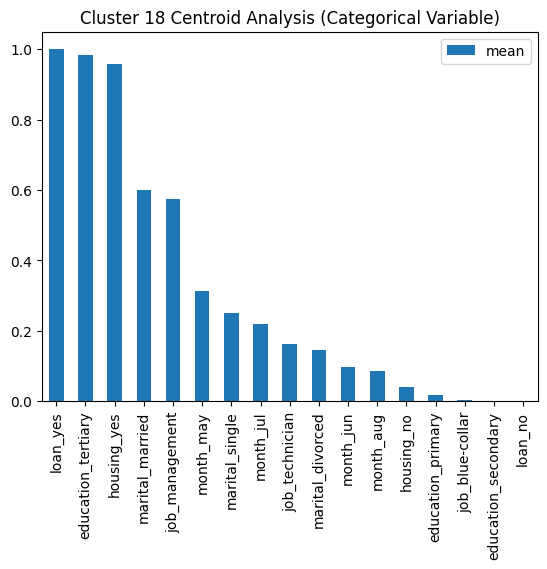

In [635]:
# Cluster 18 customer characteristics
cluster_18 = tb_fs_with_y[tb_fs_with_y['cluster_prediction'] == 18]
c18_1 = cluster_18.drop(["cluster_prediction", "y"], axis=1)
columns_without_py = c18_1.columns.values

cluster_18_transformed = pd.DataFrame(c18_1, columns=columns_without_py)

cluster_18_characteristics = pd.DataFrame(cluster_18_transformed.describe().T["mean"]).sort_values(by="mean", ascending=False)

cluster_18_characteristics.plot(kind="bar")
plt.title("Cluster 18 Centroid Analysis (Categorical Variable)")

cluster_18_characteristics

,mean
education_primary,1.000000
loan_no,1.000000
housing_yes,1.000000
marital_married,0.852146
job_blue-collar,0.732379
month_may,0.596714
month_jul,0.135665
month_jun,0.107578
marital_single,0.092740
marital_divorced,0.055114


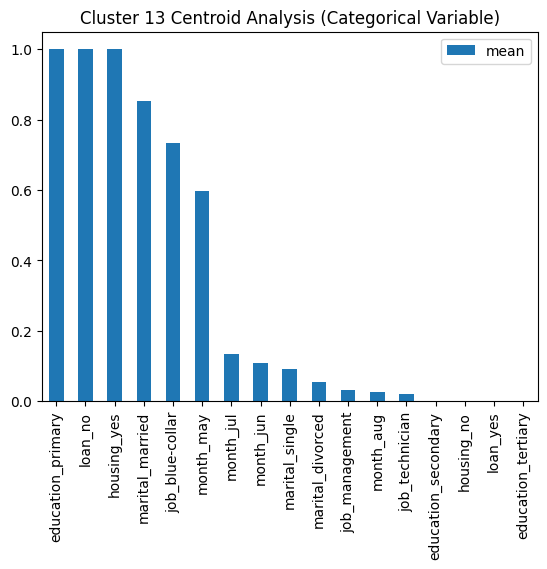

In [636]:
# Cluster 13 customer characteristics
cluster_13 = tb_fs_with_y[tb_fs_with_y['cluster_prediction'] == 13]
c13_1 = cluster_13.drop(["cluster_prediction", "y"], axis=1)
columns_without_py = c13_1.columns.values

cluster_13_transformed = pd.DataFrame(c13_1, columns=columns_without_py)

cluster_13_characteristics = pd.DataFrame(cluster_13_transformed.describe().T["mean"]).sort_values(by="mean", ascending=False)

cluster_13_characteristics.plot(kind="bar")
plt.title("Cluster 13 Centroid Analysis (Categorical Variable)")

cluster_13_characteristics